In [ ]:
import pandas as pd
import numpy as np
import TeremokTSLib as tts

In [ ]:
# Note: dataframe should be daily and have only 2 columns: date and consumption

data = pd.read_csv("your_data.csv") 

In [ ]:
# Note: this is training by default settings with pre-installed RU holidays. 
# You should probably make your own df with holidays and pass it to .train() method. Watch more about that on Prophet website.

tsmodel = tts.Model()
tsmodel.train(data=data)

Input data has missing dates. Proceeding to interpolation.
Interpolation finished successfully!
Started training Prophet model...
Started training CatBoost model...
Training finished successfully!


In [ ]:
# This is an example of inference data. You can watch needed columns via tsmodel.inference_cols method.

inference_data = pd.DataFrame(data=[['2024-07-24', 100, 65, 71, 56, 80, 73, 63], 
                                    ['2024-08-10', 120, 75, 66, 77, 56, 76, 80]], 
                              columns=['date',
                                        'ewma(10)(T+1)',
                                        'ewma(10)(T-0)',
                                        'cons(T-0)',
                                        'ewma(10)(T-1)',
                                        'cons(T-1)',
                                        'ewma(10)(T-2)',
                                        'cons(T-2)'], 
                                        index=[0, 1])

In [ ]:
# This is an example of getting consumption prediction on the days '2024-07-24' and '2024-08-10'

tsmodel.predict_consumption(data=inference_data)

array([106.4 , 126.97])

In [ ]:
# We add 2 columns stock_left (end of the day) and k_coef (how many items in one delivery box)
# And then we get predicted order on selected dates '2024-07-24' and '2024-08-10'

inference_data['stock_left'] = [50, 50]
inference_data['k_coef'] = [20, 20]
tsmodel.predict_order(data=inference_data)

array([7., 9.])

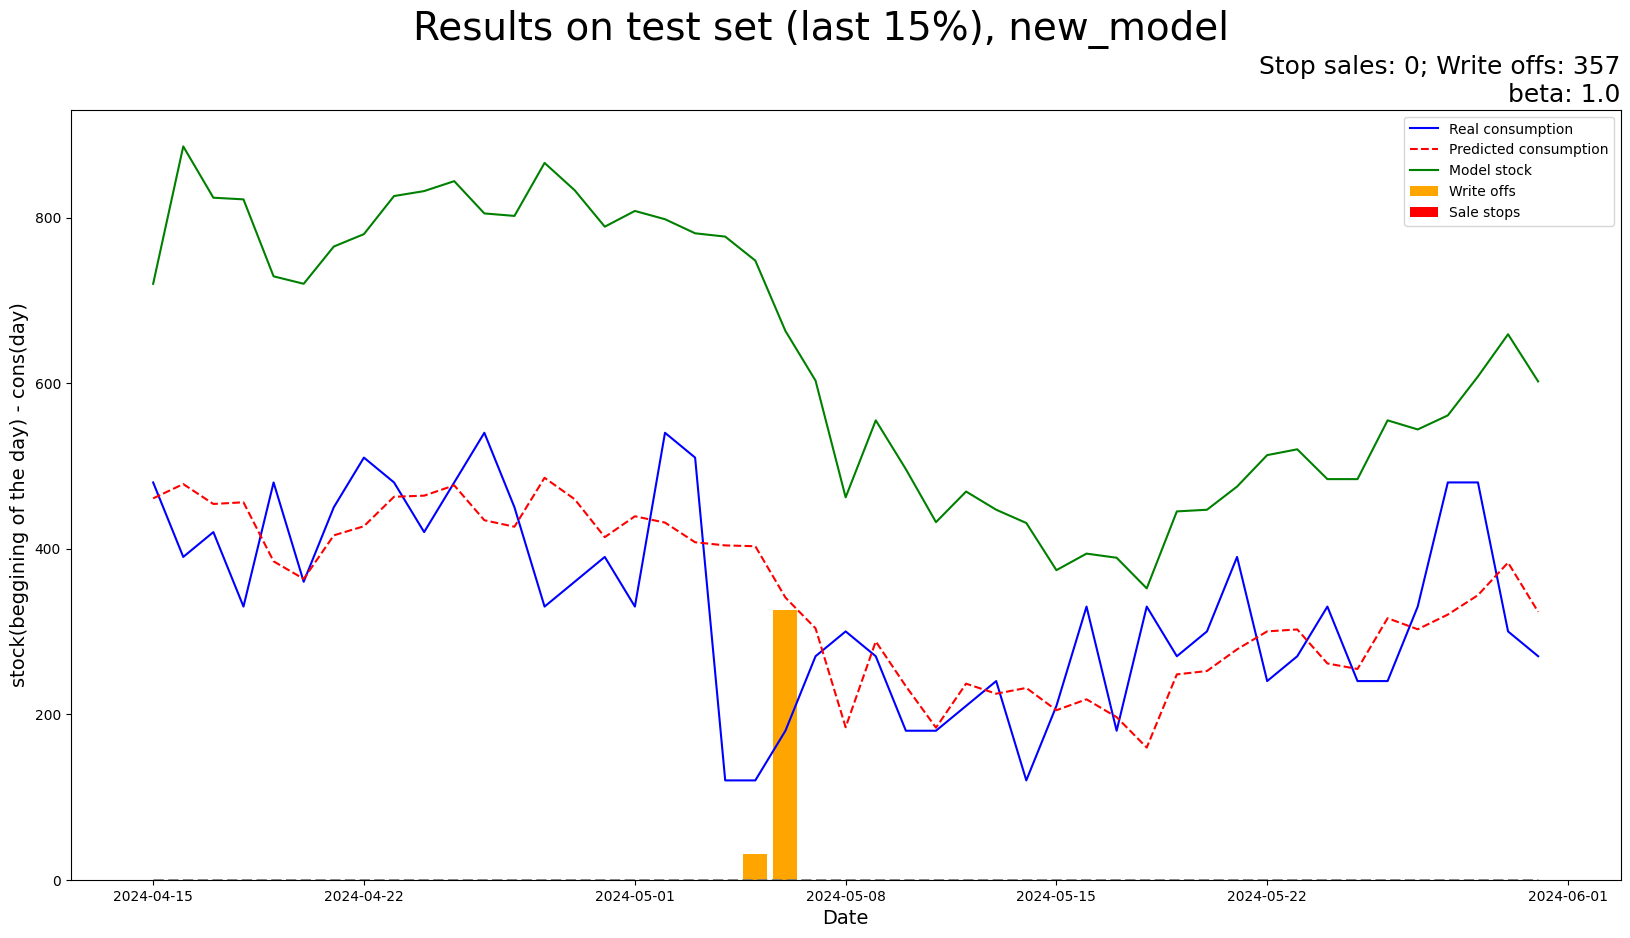

[357, 0, 357, 1.0, 15630.0]

In [ ]:
# If you want to see results of the performance of the trained model, you can use .itertest() method.
# You need to select test data and pass it to this method.

itertest_data = data[-60::]
tsmodel.itertest(test_data=itertest_data,
                 initial_stock_left=720.0)